# Mall Customer Dataset

## Introduction

Considering the mall customer Dataset we will try to cluster the customers based upon their preference. The Dataset consist of the features like Customer id, Gender,Age, Annual Income, Spending Score. We will cluster the data using various clustering algorithms Like kmeans clustering, Hierarchial clustering and evaluate the clustering performance using silhouette score.

## EDA 

In [1]:
# importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
mall_customer=pd.read_csv(r"https://raw.githubusercontent.com/balu54/datasets/main/Mall_Customers.csv")
mall_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_customer.shape

(200, 5)

In [4]:
mall_customer.drop("CustomerID",axis=1,inplace=True)


In [5]:
mall_customer.shape

(200, 4)

In [6]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ KB


In [7]:
mall_customer.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
mall_customer.duplicated().sum()

0

Text(0.5, 1.0, 'Gender')

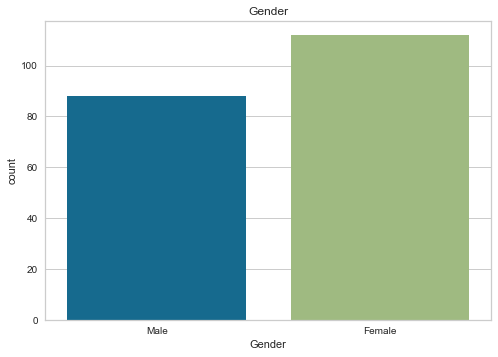

In [9]:
sns.countplot(data=mall_customer,x="Gender").set_title("Gender")

Text(0.5, 1.0, 'Age VS Annual Income(K $)')

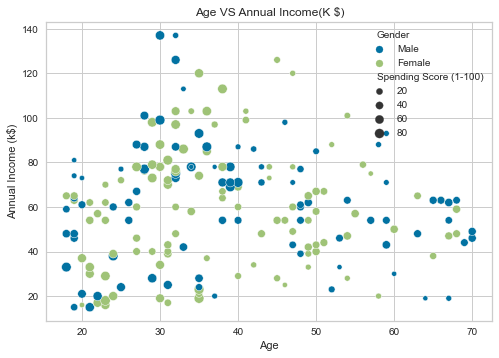

In [10]:
sns.scatterplot(data=mall_customer,x="Age",y='Annual Income (k$)',size="Spending Score (1-100)",hue="Gender").set_title("Age VS Annual Income(K $)")

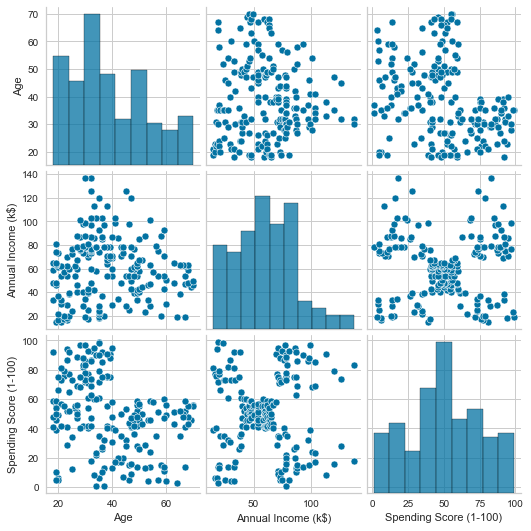

In [11]:
sns.pairplot(mall_customer)

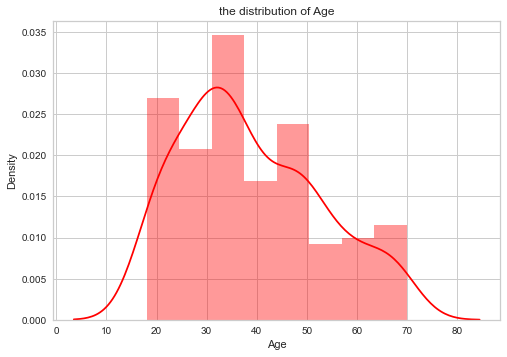

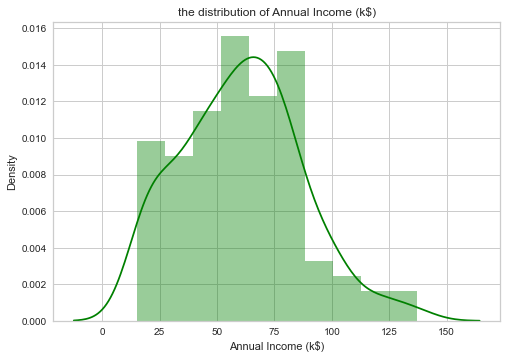

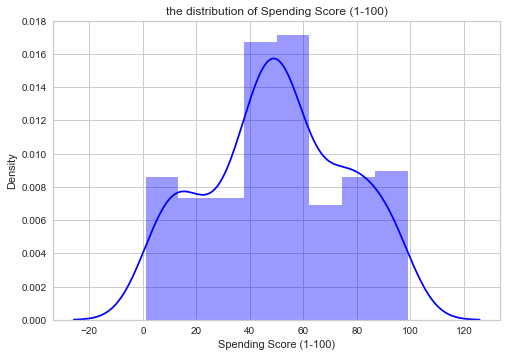

In [12]:
column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
colors=["red","green","blue"]
for i,j in zip(column,range(len(colors))):
    sns.distplot(mall_customer[i],color=colors[j])
    plt.title(f"the distribution of {i}")
    plt.show()

From the graph,we can notice that most of the customers age lies between 32 to 37.Most of the customers spending score is between 38 to 62. Most of the customers annual income is nearly 60 k $

The average spending score of the each gender is 
 Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


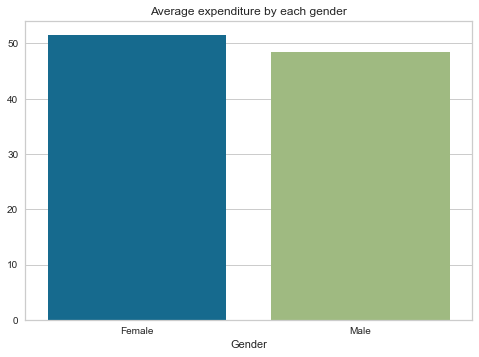

In [13]:
# Average income based upon gender
gender_average_spending_score =mall_customer.groupby("Gender")["Spending Score (1-100)"].mean()
sns.barplot(x=gender_average_spending_score.index,y=gender_average_spending_score.values).set_title("Average expenditure by each gender")
print("The average spending score of the each gender is \n",mall_customer.groupby("Gender")["Spending Score (1-100)"].mean())

From the average Expenditure score we can notice that the Female Gender spends more than Male Gender

the average annual income (k $) of the each gender  Gender
Female    60.0
Male      62.5
Name: Annual Income (k$), dtype: float64


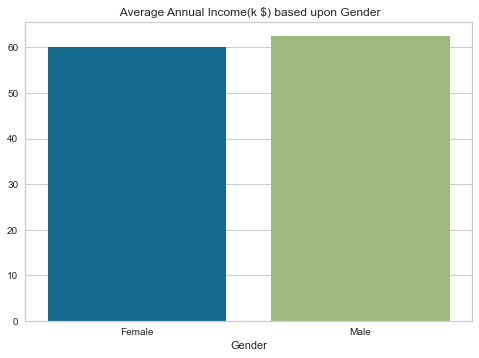

In [14]:
gender_average_income =mall_customer.groupby("Gender")["Annual Income (k$)"].median()
sns.barplot(x=gender_average_income.index,y=gender_average_income.values).set_title(" Average Annual Income(k $) based upon Gender");
print("the average annual income (k $) of the each gender ",mall_customer.groupby("Gender")["Annual Income (k$)"].median())

From the Graph we can notice that the Average Annual Income of the Male is higher than the female

In [15]:
Gender=pd.get_dummies(mall_customer["Gender"],drop_first=True)

In [16]:
mall_customer=mall_customer.drop("Gender",axis=1)

In [17]:
mall_customer=pd.concat([Gender,mall_customer],axis=1)

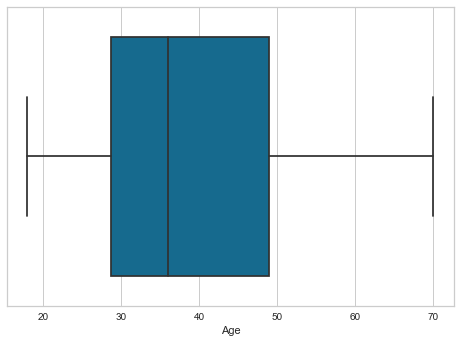

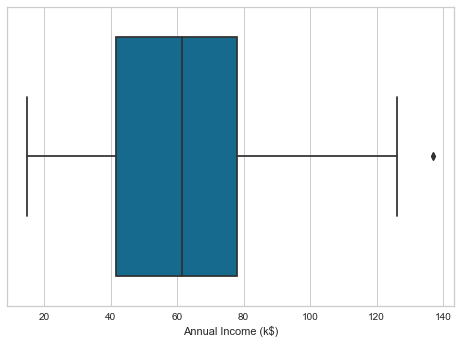

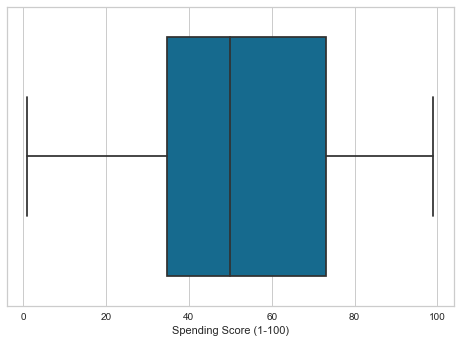

In [18]:
column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    sns.boxplot(mall_customer[i])
    plt.show()

In [19]:
def outlier_removal(dataset,i):
  q1=dataset[i].quantile(.25)
  q3=dataset[i].quantile(.75)
  iqr=q3-q1
  lower_limit=q1-(1.5*iqr)
  upper_limit=q3+(1.5*iqr)
  dataset=dataset[(dataset[i]>lower_limit) & (dataset[i]<upper_limit)]
  return dataset

In [20]:
for i in mall_customer.columns:
  mall_customer=outlier_removal(mall_customer,i)
mall_customer.head()

,Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


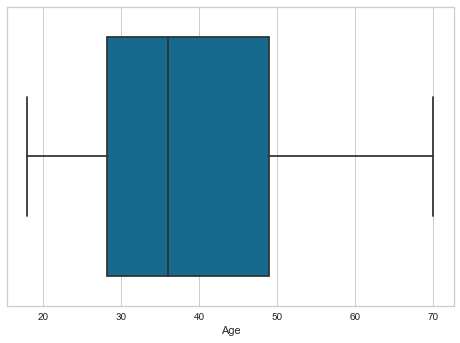

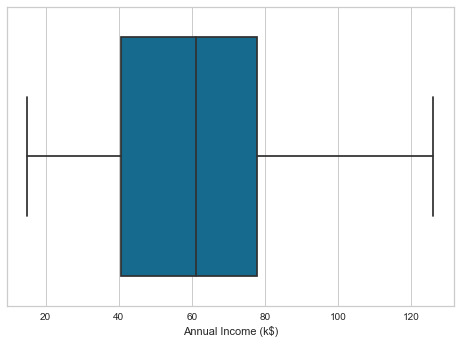

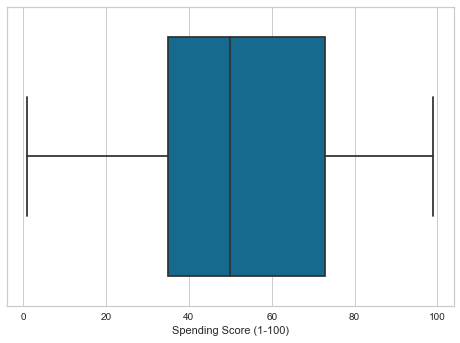

In [21]:
column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    sns.boxplot(mall_customer[i])
    plt.show()

<AxesSubplot:>

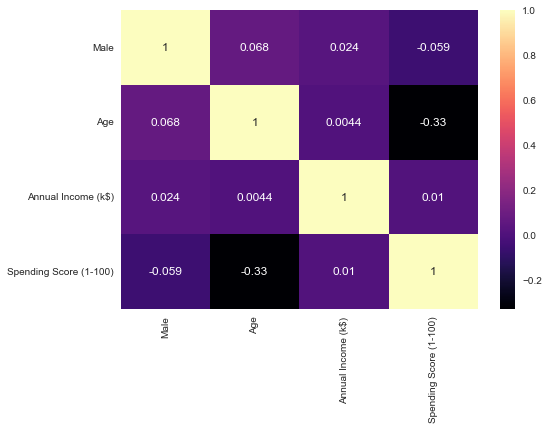

In [22]:
sns.heatmap(mall_customer.corr(),annot=True,cmap="magma")

Text(0.5, 1.0, ' Annual Income VS Spending Score')

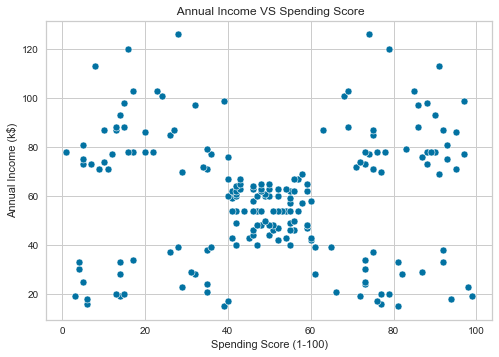

In [23]:
sns.scatterplot(data=mall_customer,y="Annual Income (k$)",x="Spending Score (1-100)").set_title(" Annual Income VS Spending Score")

## K Means Clustering

Clustering based on 2 features

Clustering the dataset Based Annual Income(K $) and The Spending Score as the important Features

In [24]:
X=mall_customer.iloc[:,2:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [25]:
wcss=[]
for i in range(1,10):
    k_mean=KMeans(n_clusters=i)
    k_mean.fit(X)
    wcss.append(k_mean.inertia_)

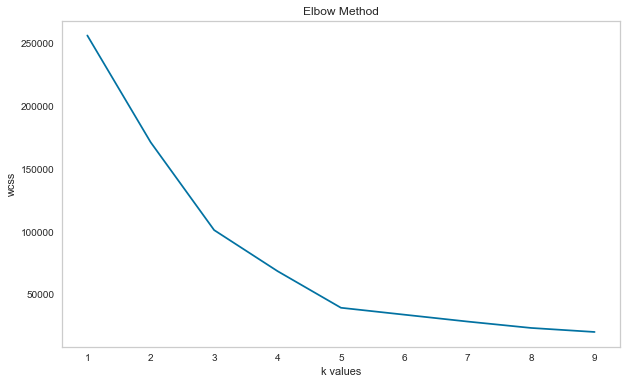

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss)
plt.xlabel("k values")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.grid(False)

From the Elbow Method choosing K=5.

In [27]:
k_mean=KMeans(n_clusters=5)
k_mean.fit(X)
y_labels=k_mean.predict(X)
print(set(y_labels))

{0, 1, 2, 3, 4}


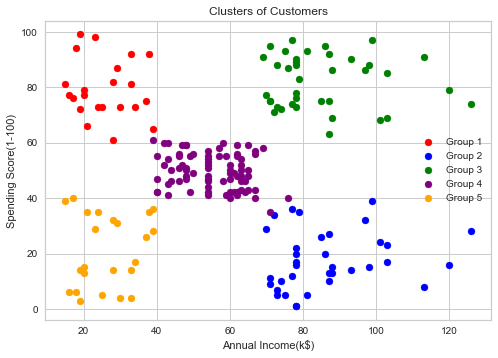

In [28]:
X=mall_customer.iloc[:,2:].values
plt.scatter(X[y_labels==0, 0], X[y_labels==0, 1], c='red', label ='Group 1')
plt.scatter(X[y_labels==1, 0], X[y_labels==1, 1], c='blue', label ='Group 2')
plt.scatter(X[y_labels==2, 0], X[y_labels==2, 1], c='green', label ='Group 3')
plt.scatter(X[y_labels==3, 0], X[y_labels==3, 1], c='purple', label ='Group 4')
plt.scatter(X[y_labels==4, 0], X[y_labels==4, 1], c='orange', label ='Group 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [29]:
#silhoutte Scoring
score=silhouette_score(X,y_labels,metric="euclidean")
print("silhouette score is",score)

silhouette score is 0.5606825090788626


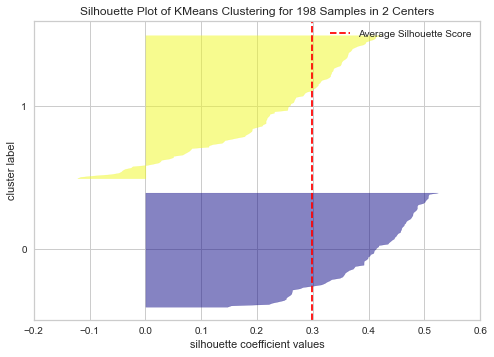

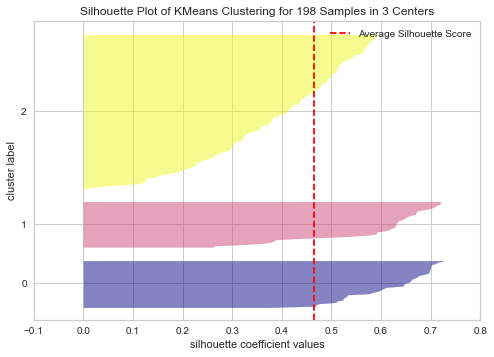

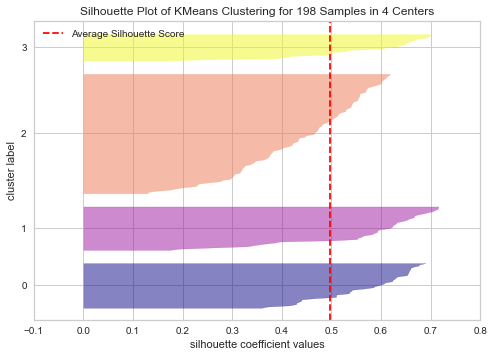

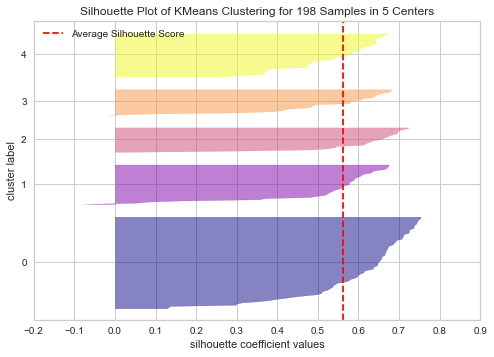

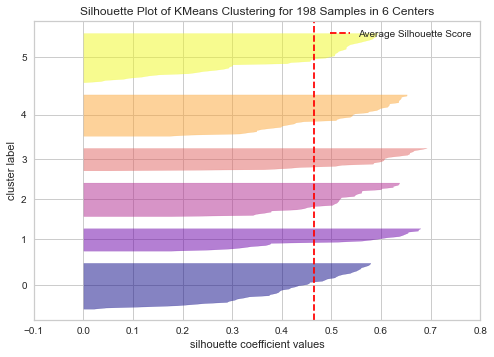

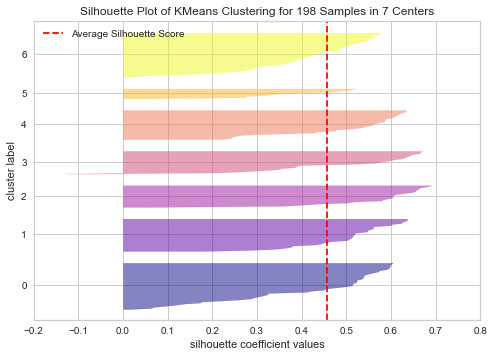

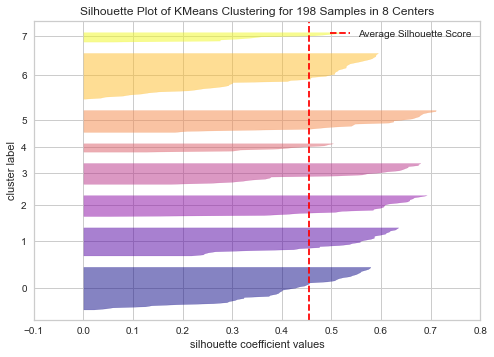

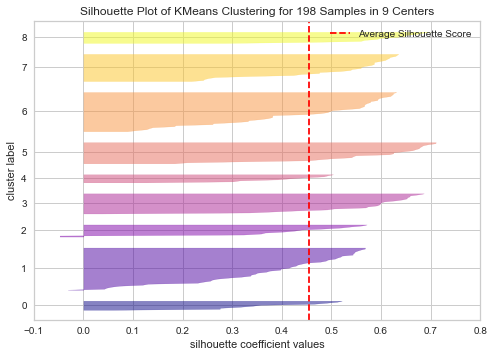

In [30]:
# Load a clustering dataset
X=mall_customer.iloc[:,2:]

# Instantiate the clustering model and visualizer
for i in range(2,10):
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='plasma')
    visualizer.fit(X)    
    visualizer.show()    

Clustering the dataset considering all the features

In [31]:
X=mall_customer.iloc[:,:]

In [32]:
X.head()

,Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [33]:
wcss=[]
for i in range(1,10):
    k_mean=KMeans(n_clusters=i)
    k_mean.fit(X)
    wcss.append(k_mean.inertia_)

Text(0.5, 1.0, 'Elbow Method')

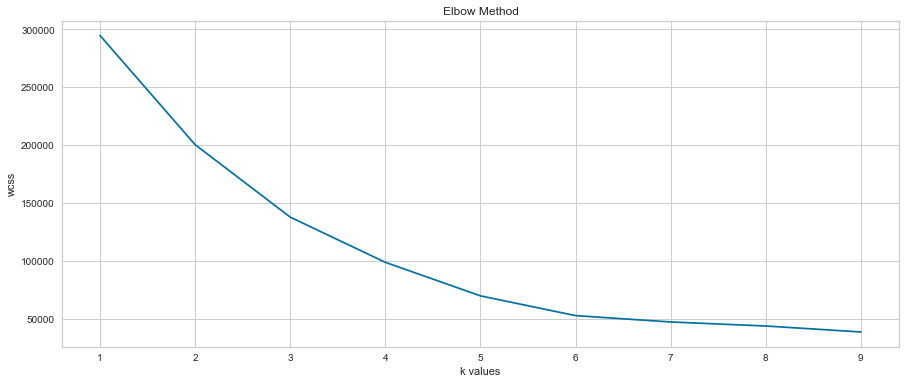

In [34]:
plt.figure(figsize=(15,6))
plt.plot(range(1,10),wcss)
plt.xlabel("k values")
plt.ylabel("wcss")
plt.title("Elbow Method")

6 Clusters Identified as per Elbow Method

In [35]:
k_mean=KMeans(n_clusters=6,random_state=42)
k_mean.fit(X)
y_labels=k_mean.predict(X)

In [36]:
#silhoutte Scoring
from sklearn.metrics import silhouette_score
score=silhouette_score(X,y_labels,metric="euclidean")
print("silhouette score is",score)

silhouette score is 0.459547253140841


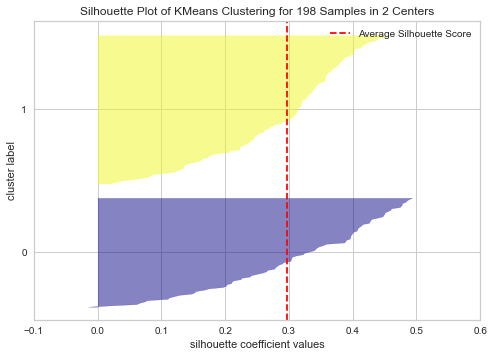

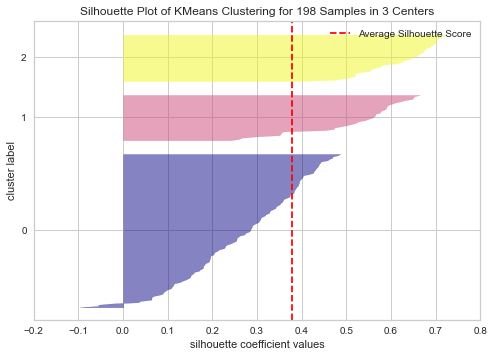

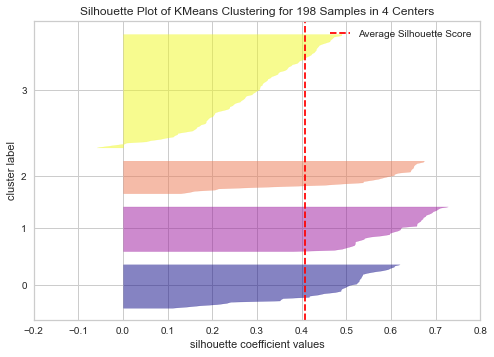

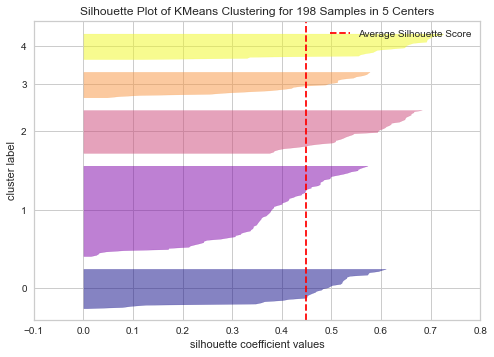

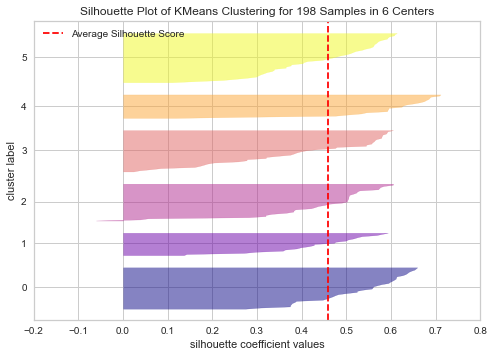

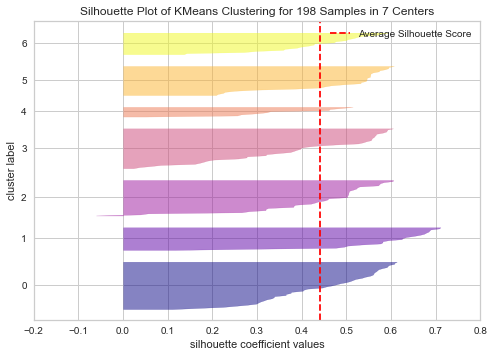

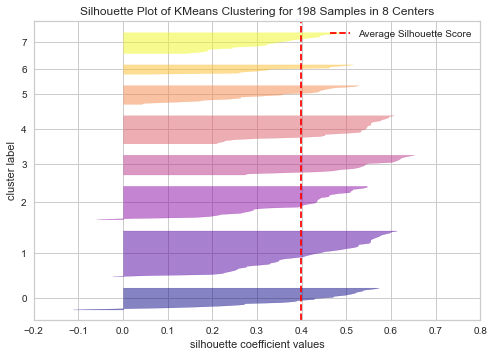

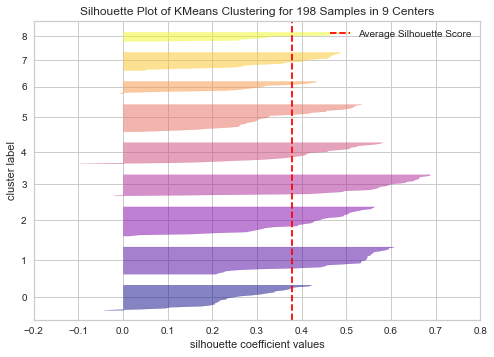

In [37]:
# Load a clustering dataset
X=mall_customer.iloc[:,:]

# Instantiate the clustering model and visualizer
for i in range(2,10):
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='plasma')
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

## Hierarchical Clustering 

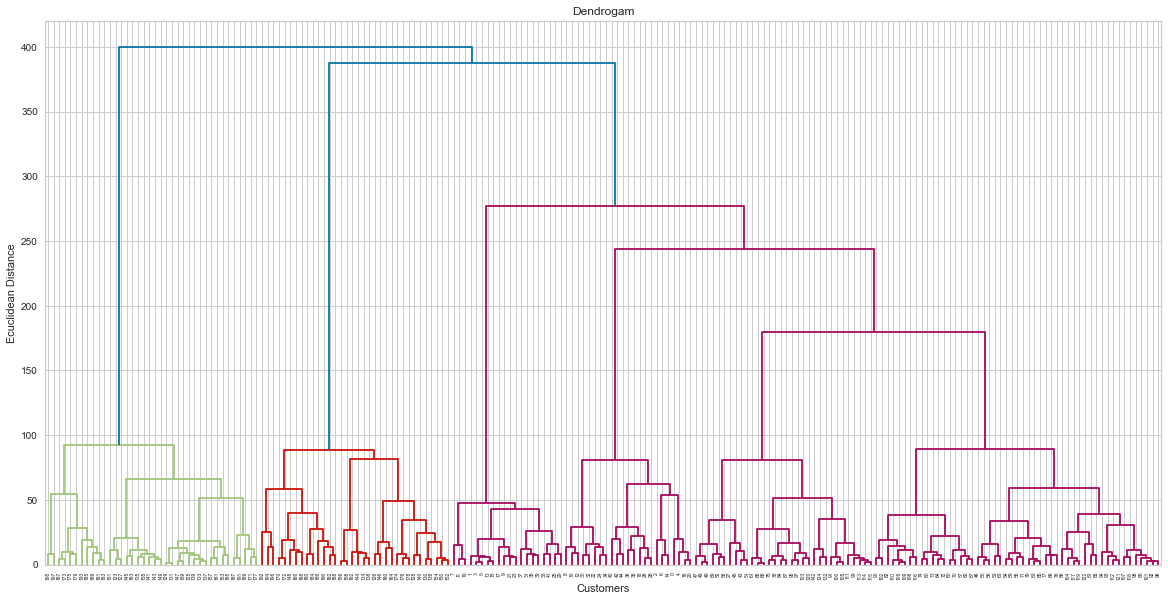

In [38]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

From the dendogram choosing The no of clusters as 6

In [39]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [40]:
score=silhouette_score(X,y_hc,metric="euclidean")
print("silhouette score is",score)

silhouette score is 0.4500102449981558


## Conclusion 

Thus, we have analysed Customer data and performed K Means Clustering and Agglomerative Clustering Algorithm. These kind of cluster analysis helps design better customer acquisition strategies and helps in business growth.